<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 3.4

3.4.1 Logistic Regression
# Logistic Regression is a statistical model used for binary classification problems.
# It predicts the probability of a data point belonging to a particular class (e.g., 0 or 1).

# Key Concepts:

# 1. Sigmoid Function:
# The core of logistic regression is the sigmoid function, which maps any input value to a probability between 0 and 1.
# Mathematically:  σ(z) = 1 / (1 + exp(-z)), where z is a linear combination of input features.

# 2. Linear Combination:
# Similar to linear regression, logistic regression computes a weighted sum of input features.
# Mathematically: z = w0 + w1*x1 + w2*x2 + ... + wn*xn,  where:
#    * wi represents the weight for feature xi
#    * w0 is the bias term.
#    * x1, x2, ..., xn are the input features.

# 3. Probability Estimation:
# The output of the sigmoid function is interpreted as the probability of the data point belonging to the positive class (usually class 1).
# Mathematically: P(y=1|x) = σ(z), where P(y=1|x) is the conditional probability of y being 1 given input x.

# 4. Decision Boundary:
# A threshold is set (typically 0.5).  If P(y=1|x) > 0.5, the data point is classified as belonging to class 1; otherwise, it's class 0.
# This threshold creates a decision boundary in the feature space.

# 5. Cost Function (Log-Loss):
# Model training involves finding weights that minimize a cost function, typically log-loss. This function measures the difference between predicted probabilities and actual labels.
# Mathematically:  Cost(w) = -(1/m) * Σ [yi * log(σ(zi)) + (1-yi) * log(1 - σ(zi))], where:
#   * m is the number of training examples
#   * yi is the actual class label (0 or 1) for the ith example
#   * σ(zi) is the predicted probability for the ith example.

# 6. Optimization (Gradient Descent):
# The weights are updated iteratively to minimize the cost function.  Gradient descent is a common optimization algorithm for this purpose.  
# The gradient of the cost function with respect to each weight is calculated and used to update the weights.
# Mathematically: wi(t+1) = wi(t) - α * ∂Cost(w)/∂wi,  where:
#   * wi(t+1) is the updated weight
#   * wi(t) is the current weight
#   * α is the learning rate (step size)
#   * ∂Cost(w)/∂wi is the partial derivative of the cost function with respect to weight wi


# In summary: Logistic Regression combines a linear combination of input features with a sigmoid function to estimate the probability of a data point belonging to a particular class.
# The model is trained by minimizing a cost function (log-loss) using optimization algorithms like gradient descent to find the optimal weights.


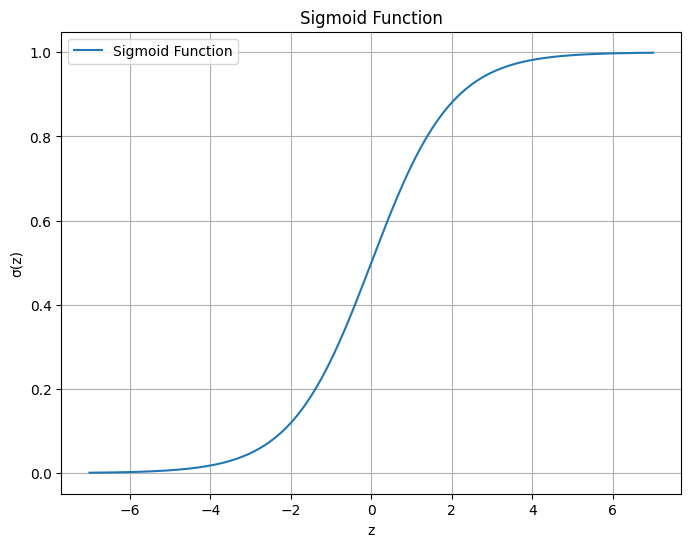

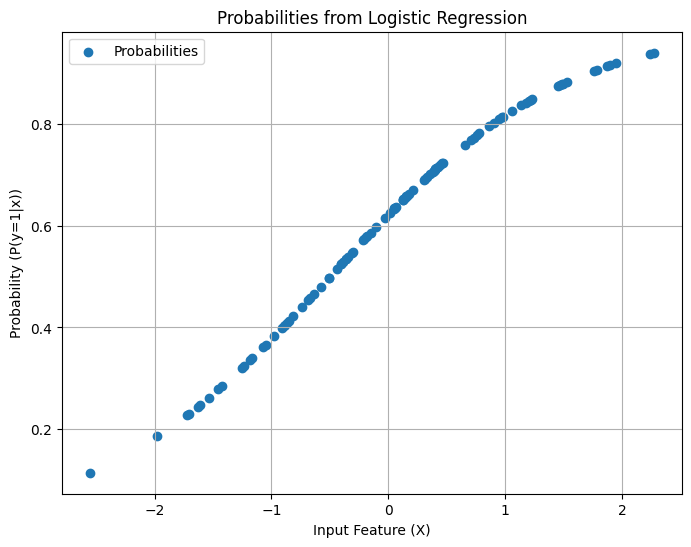

Example Log-loss: 0.14462152754328741


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Use expit for sigmoid

# Generate some sample data (replace with your own data)
np.random.seed(0)
X = np.random.randn(100, 1)  # 100 samples, 1 feature
y = (X > 0.5).astype(int).ravel()  # Binary labels (0 or 1)


# Sigmoid function
def sigmoid(z):
  return expit(z)

# Plot the sigmoid function
z = np.linspace(-7, 7, 200)
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid(z), label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()


# Example of linear combination
w0 = 0.5  # Bias term
w1 = 1.0 # weight for the single feature x
z = w0 + w1*X

# Calculate probabilities
probabilities = sigmoid(z)

# Plot the probabilities against the input features
plt.figure(figsize=(8,6))
plt.scatter(X, probabilities, label='Probabilities')
plt.xlabel('Input Feature (X)')
plt.ylabel('Probability (P(y=1|x))')
plt.title('Probabilities from Logistic Regression')
plt.grid(True)
plt.legend()
plt.show()


# Demonstrate log-loss calculation (a simplified example)
def log_loss(y_true, y_pred):
  epsilon = 1e-15 # to avoid log(0)
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Example log-loss calculation
y_pred_example = np.array([0.1, 0.8, 0.9])
y_true_example = np.array([0, 1, 1])
loss = log_loss(y_true_example, y_pred_example)
print(f"Example Log-loss: {loss}")
